In [271]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.feature
from sklearn.linear_model import SGDClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from keras.utils import np_utils

In [284]:
trnImages = np.load('trnImage.npy')
trnLabelF = np.load('trnLabel_fine.npy')
trnLabelC = np.load('trnlabel_coarse.npy')
tstImage = np.load('tstImage.npy')
tstLabelF = np.load('tstLabel_fine.npy')
tstLabelC = np.load('tstLabel_coarse.npy')




subcategory = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'] 

category = ['aquatic_mammals', 'fish', 'flowers', 'food_containers', 'fruit_and_vegetables', 'household_electrical_devices', 'household_furniture', 'insects', 'large_carnivores', 'large_man-made_outdoor_things', 'large_natural_outdoor_scenes', 'large_omnivores_and_herbivores', 'medium_mammals', 'non-insect_invertebrates', 'people', 'reptiles', 'small_mammals', 'trees', 'vehicles_1', 'vehicles_2']

tstImage.shape
trnLabelF.shape
trnImages = np.transpose(trnImages, [3, 0, 1, 2])
print(trnImages.shape)
tstImage = np.transpose(tstImage, [3, 0, 1, 2])

#tstLabelF = np_utils.to_categorical(tstLabelF,100)
#trnLabelF = np_utils.to_categorical(trnLabelF,100)

(50000, 32, 32, 3)


Image is 4D

- 1 is samples
- 2 is Height
- 3 is Width
- 4 is RGB


Example of loading some images

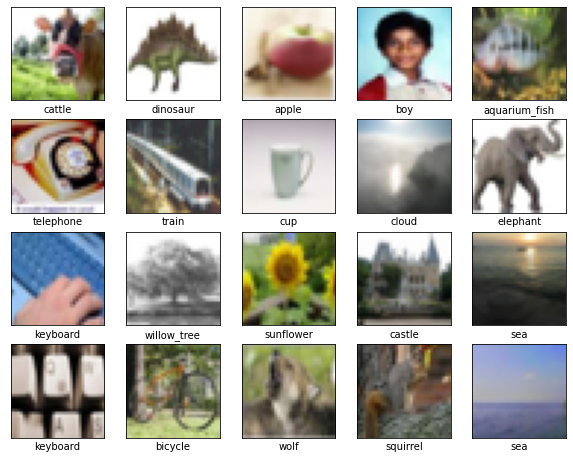

In [285]:
plt.figure(figsize=(10,10))

for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    #plt.grid(False)
    plt.imshow(trnImages[i])
    plt.xlabel(subcategory[trnLabelF[i]])

plt.show()


In [286]:
model = keras.models.Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding = 'same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu', padding = 'same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu', padding = 'same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(512, activation='relu',))
model.add(Dropout(0.5))
#model.add(Dense(64, activation='relu'))
model.add(Dense(100, activation= 'softmax'))

opt = SGD()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_161 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_141 (MaxPoolin (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_162 (Conv2D)          (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_142 (MaxPoolin (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_163 (Conv2D)          (None, 8, 8, 128)       

In [287]:
history = model.fit(trnImages, trnLabelF, epochs=10, batch_size = 128, validation_split=0.2, verbose = 1)

Epoch 1/10
313/313 [==============================] - 30s 95ms/step - loss: 4.2132 - accuracy: 0.0549 - val_loss: 3.7866 - val_accuracy: 0.1286
Epoch 2/10
313/313 [==============================] - 32s 102ms/step - loss: 3.6313 - accuracy: 0.1444 - val_loss: 3.3364 - val_accuracy: 0.2046
Epoch 3/10
313/313 [==============================] - 35s 111ms/step - loss: 3.3065 - accuracy: 0.1981 - val_loss: 3.0570 - val_accuracy: 0.2565
Epoch 4/10
313/313 [==============================] - 37s 119ms/step - loss: 3.0924 - accuracy: 0.2425 - val_loss: 2.9116 - val_accuracy: 0.2908
Epoch 5/10
313/313 [==============================] - ETA: 0s - loss: 2.9440 - accuracy: 0.2664

In [281]:
results = model.evaluate(tstImage, tstLabelF)

print(f'Test set loss: {results[0]:0.2f}, test set accuracy: {results[1]*100:0.2f}%')

313/313 [==============================] - 3s 10ms/step - loss: 2.3740 - accuracy: 0.3945
Test set loss: 2.37, test set accuracy: 39.45%


In [279]:
model.summary()


Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_155 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_135 (MaxPoolin (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_156 (Conv2D)          (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_136 (MaxPoolin (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_157 (Conv2D)          (None, 8, 8, 128)       